# STAGE 4: ANALYZE - Trip Counts and Trip Duration by Rider Type by Bike Type

#### Ingest the big csv to get ready for analysis

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import datetime

dtypes = {'ride_id': 'str', 'rideable_type': 'category',  'start_station_id': 'category', 
            'end_station_id': 'category', 'member_casual': 'category'}
usecols = ['ride_id', 'rideable_type',  #'start_station_id', 'end_station_id',
             'member_casual','started_at','ended_at'#,'start_lat','start_lng','end_lat','end_lng'
          ]

# this is a function to read the trip files,
def read_csv_to_df(filename, dtype, usecols):
    df = pd.read_csv(filename, parse_dates=['started_at','ended_at'], dtype = dtype, usecols=usecols)
    print (filename,df.memory_usage(deep=True).sum()/1e+6, " Mbytes")
    return df

dfbig = read_csv_to_df('dfbig.csv', dtypes, usecols)

dfbig.csv 918.326176  Mbytes


In [ ]:
## add more attribute columns : Ym, duration, hr, weekday

In [2]:
def yearmonth(d):
    from datetime import datetime
    return d.strftime('%Y%m')

dfbig['Ym']=dfbig['started_at'].apply(yearmonth)

dfbig['duration']= (dfbig['ended_at']-dfbig['started_at']).apply(datetime.timedelta.total_seconds)/60

dfbig['hr']=dfbig['started_at'].dt.hour
dfbig['weekday']=dfbig['started_at'].dt.dayofweek

In [3]:
## partition data into weekday and weekend

In [4]:
dfbig_weekday = dfbig[dfbig['weekday']<5]

dfbig_weekend = dfbig[dfbig['weekday']>=5]

In [5]:
## calculate stats group by hour of day

In [6]:
dfduration_stats_weekday = dfbig_weekday.drop(['ride_id','started_at','ended_at','rideable_type','weekday'], axis=1).groupby(['member_casual','Ym','hr']).describe()

dfduration_stats_weekend = dfbig_weekend.drop(['ride_id','started_at','ended_at','rideable_type','weekday'], axis=1).groupby(['member_casual','Ym','hr']).describe()

In [7]:
dfduration_stats_weekday.head()

duration                                             \
                           count       mean        std       min        25%   
member_casual Ym     hr                                                       
casual        202004 0      61.0  30.290710  34.901825  4.700000  11.550000   
                     1      26.0  15.732051  12.781581  4.216667   7.366667   
                     2      27.0  31.783951  47.181677  5.000000   9.525000   
                     3      18.0  26.675926  29.546296  3.733333   6.904167   
                     4      21.0  39.302381  39.160201  4.650000  14.883333   

                                                           
                               50%        75%         max  
member_casual Ym     hr                                    
casual        202004 0   24.833333  38.233333  263.533333  
                     1    8.016667  23.645833   56.733333  
                     2   18.883333  27.475000  190.066667  
                     3   10.800000  35.445833   93.133333  
                     4   25.116667  30.400000  118.533333

In [8]:
dfduration_stats_weekday1 = dfduration_stats_weekday.reset_index()
dfduration_stats_weekday1.columns = ['member type','Ym','hr','count','mean','std','min','25%','50%','75%','max']

In [9]:
dfduration_stats_weekday1.head(1)

,member type,Ym,hr,count,mean,std,min,25%,50%,75%,max
0,casual,202004,0,61.0,30.29071,34.901825,4.7,11.55,24.833333,38.233333,263.533333


In [10]:
dfduration_stats_weekday_count=pd.melt(dfduration_stats_weekday1, id_vars=['member type','Ym','hr'], value_vars=[ 'count'])
dfduration_stats_25_50_75_weekday_minutes=pd.melt(dfduration_stats_weekday1, id_vars=['member type','Ym','hr'], value_vars=['25%', '50%','75%'])

In [11]:
dfduration_stats_25_50_75_weekday_minutes.head()

,member type,Ym,hr,variable,value
0,casual,202004,0,25%,11.550000
1,casual,202004,1,25%,7.366667
2,casual,202004,2,25%,9.525000
3,casual,202004,3,25%,6.904167
4,casual,202004,4,25%,14.883333


In [13]:
dfduration_stats_weekend1 = dfduration_stats_weekend.reset_index()
dfduration_stats_weekend1.columns = ['member type','Ym','hr','count','mean','std','min','25%','50%','75%','max']

In [14]:
dfduration_stats_weekend_count=pd.melt(dfduration_stats_weekend1, id_vars=['member type','Ym','hr'], value_vars=[ 'count'])
dfduration_stats_25_50_75_weekend_minutes=pd.melt(dfduration_stats_weekend1, id_vars=['member type','Ym','hr'], value_vars=['25%', '50%','75%'])

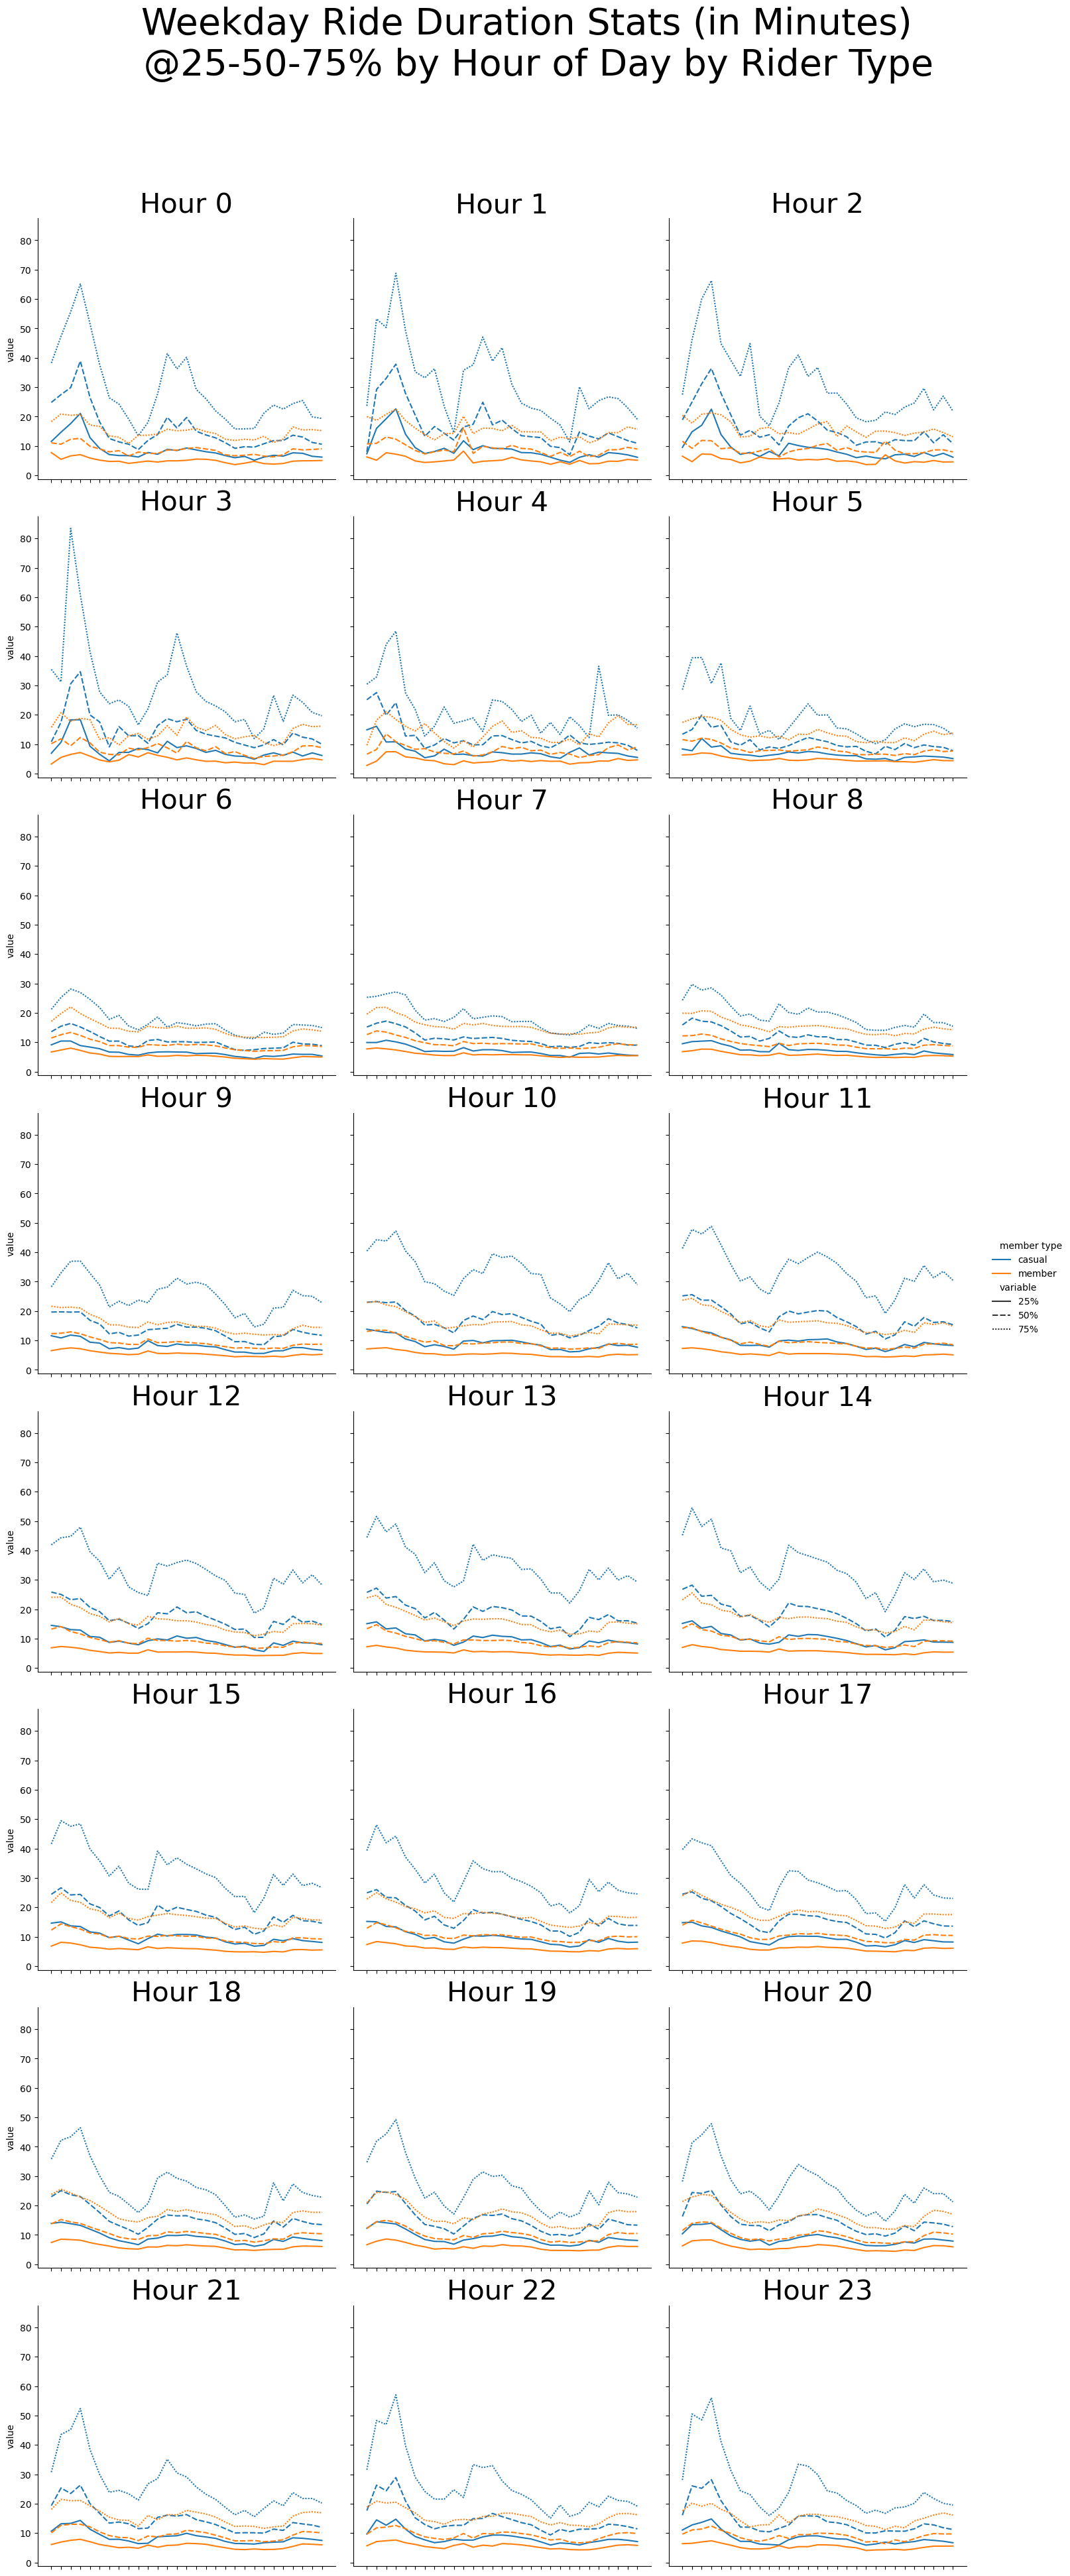

In [15]:
g=sns.relplot(
    data=dfduration_stats_25_50_75_weekday_minutes, x="Ym", y="value", col= "hr", style='variable',hue="member type", col_wrap=3, kind="line"
)
g.fig.suptitle('Weekday Ride Duration Stats (in Minutes) \n @25-50-75% by Hour of Day by Rider Type', size=40)
g.set_titles("Hour {col_name}", size=30)
g.tight_layout()
g.set_xticklabels(rotation=90)
g.set_xlabels("")
plt.subplots_adjust(top=0.9)
plt.savefig('./Figures/Weekday_Ride_Duration_byHr_by_RiderType.png', bbox_inches='tight')

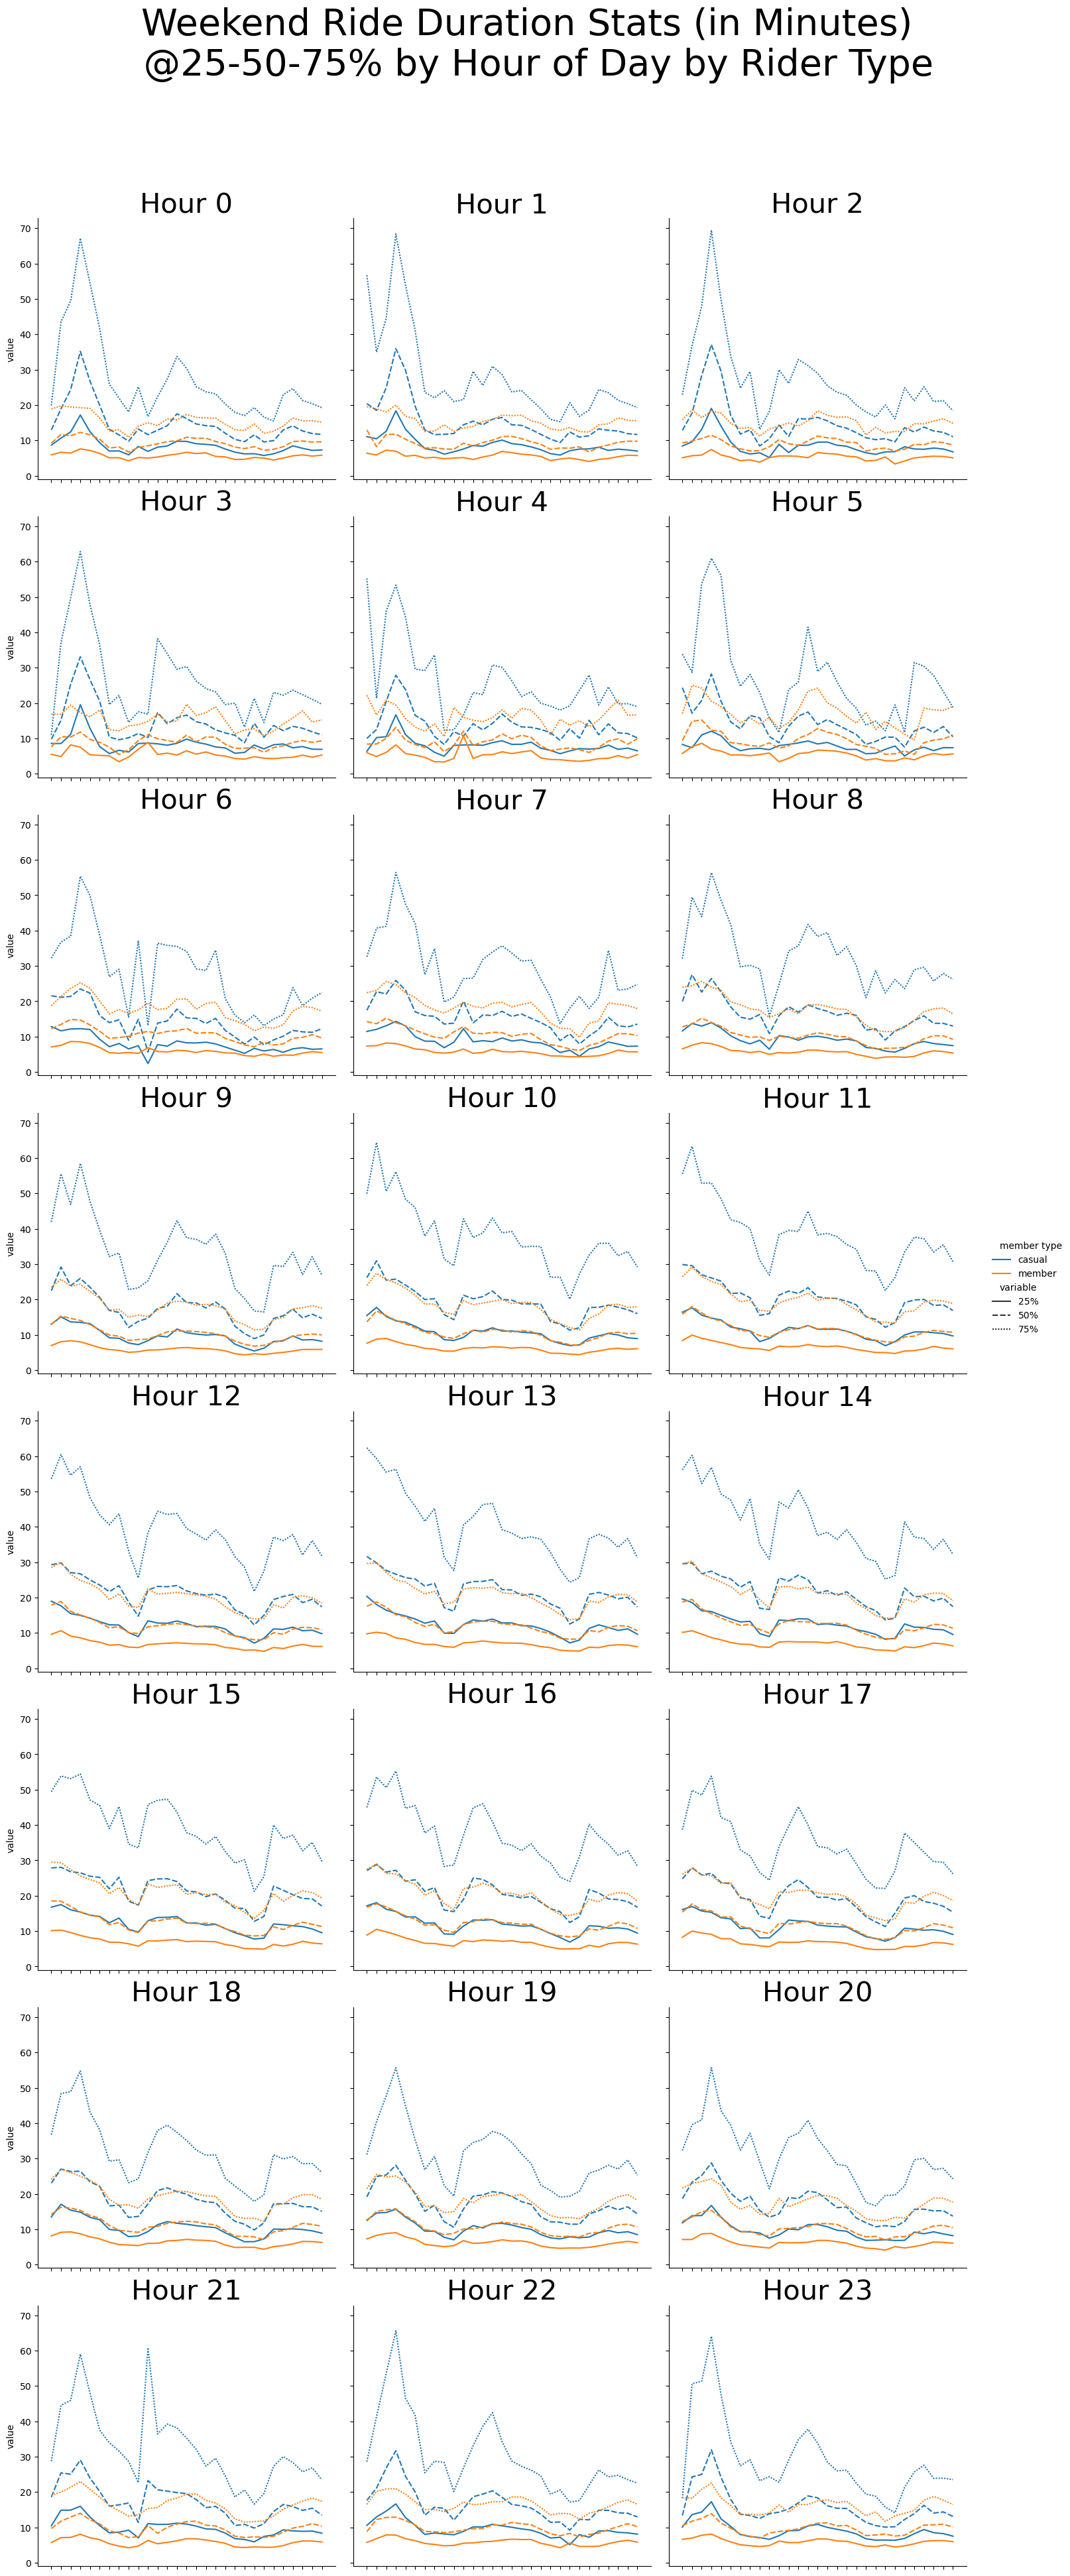

In [16]:
g=sns.relplot(
    data=dfduration_stats_25_50_75_weekend_minutes, x="Ym", y="value", col= "hr", style='variable',hue="member type", col_wrap=3, kind="line"
)
g.fig.suptitle('Weekend Ride Duration Stats (in Minutes) \n @25-50-75% by Hour of Day by Rider Type', size=40)
g.set_titles("Hour {col_name}", size=30)
g.tight_layout()
g.set_xticklabels(rotation=90)
g.set_xlabels("")
plt.subplots_adjust(top=0.9)
plt.savefig('./Figures/Weekend_Ride_Duration_byHr_by_RiderType.png', bbox_inches='tight')

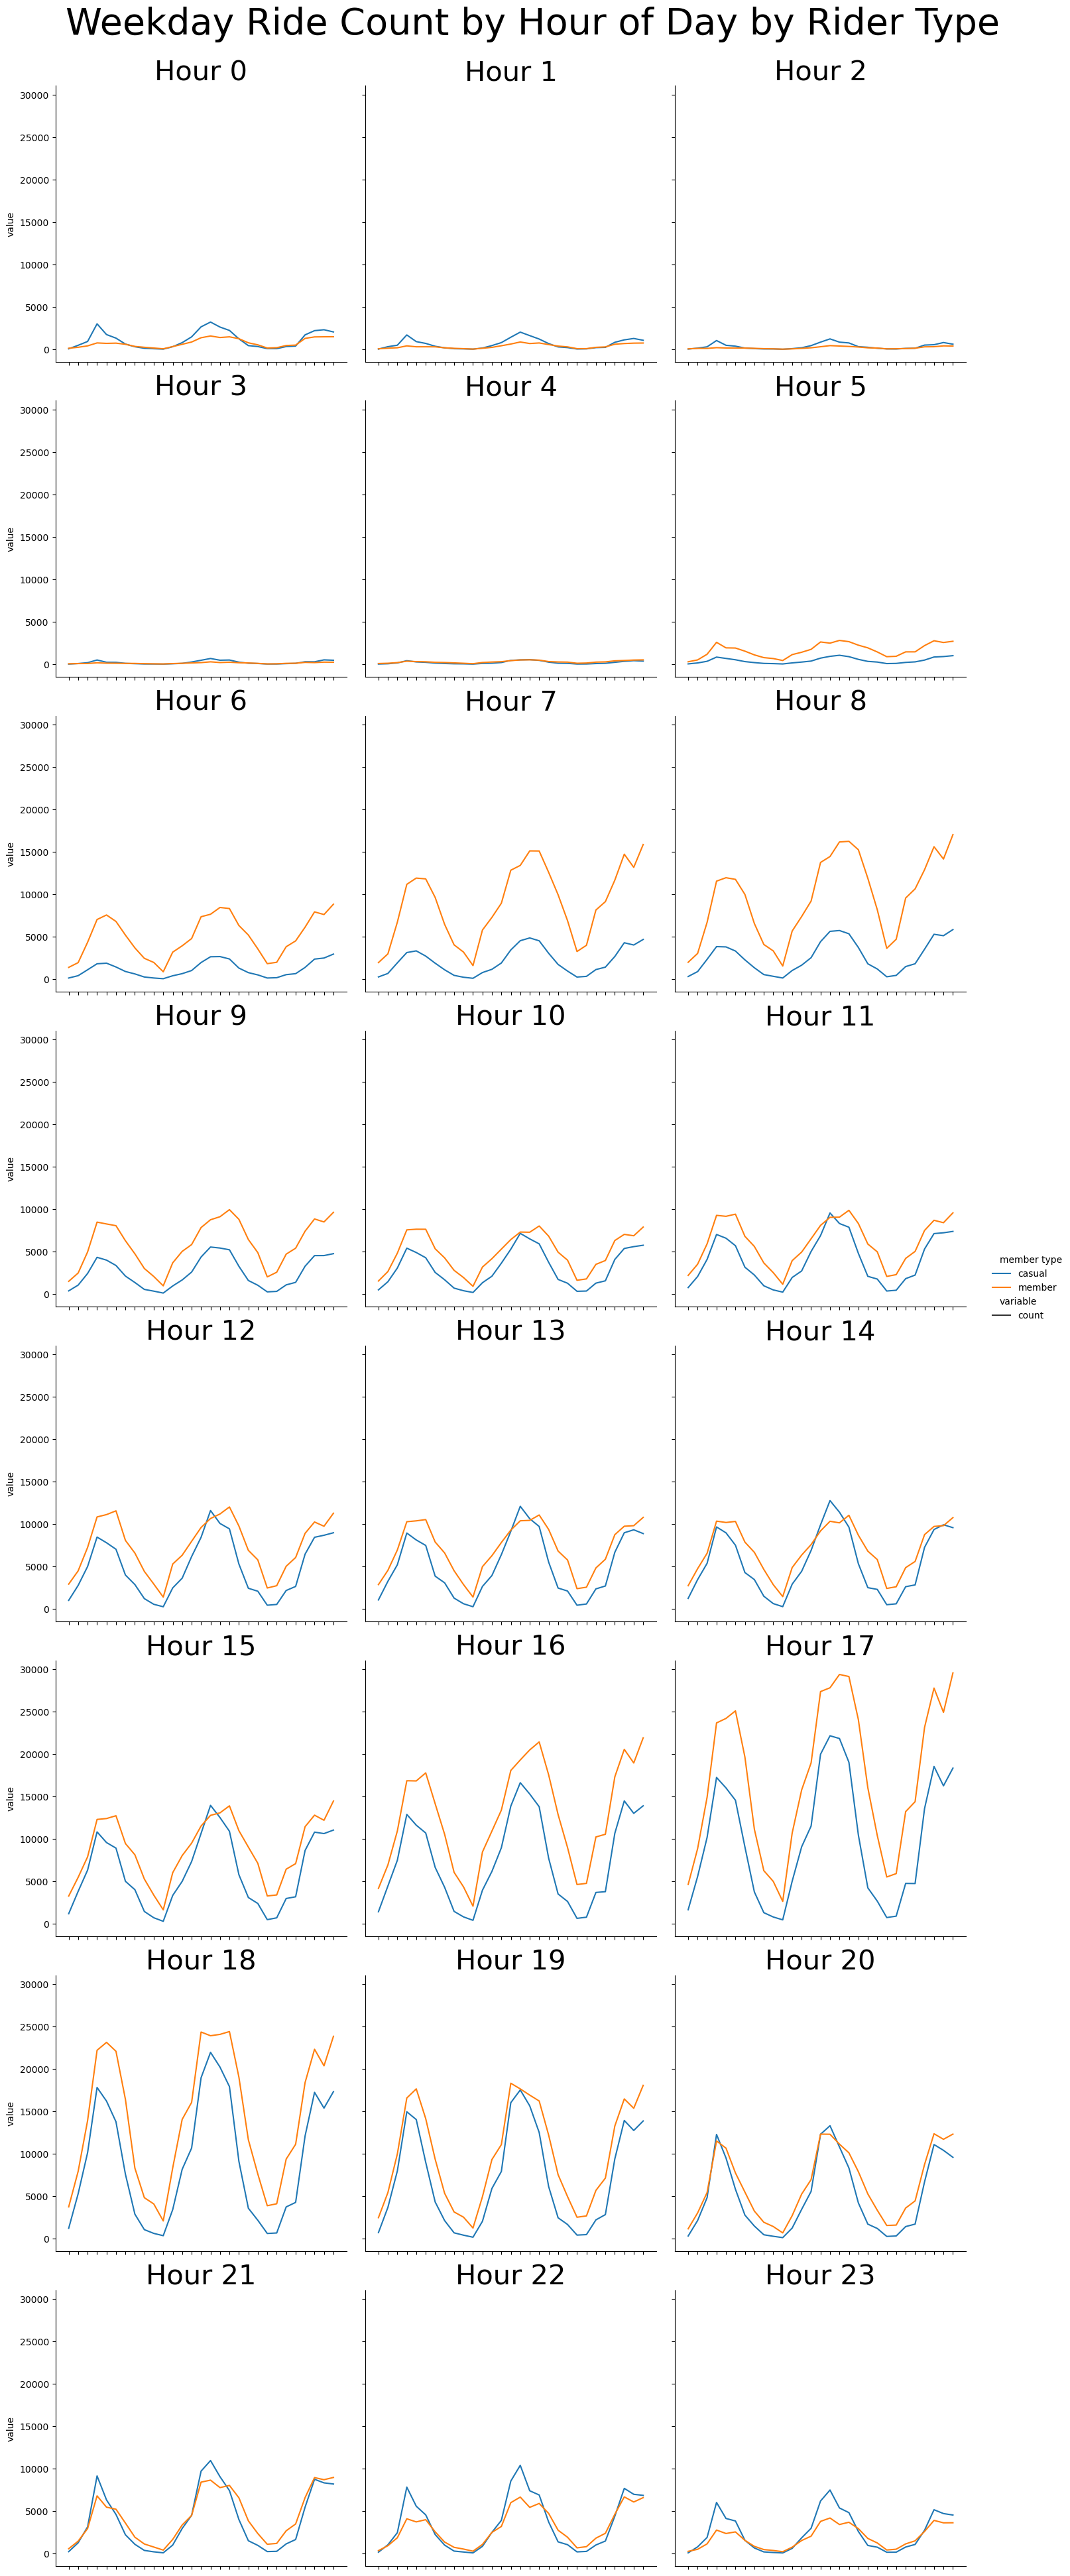

In [17]:
g=sns.relplot(
    data=dfduration_stats_weekday_count, x="Ym", y="value", col= "hr", style='variable',hue="member type", col_wrap=3, kind="line"
)
g.fig.suptitle('Weekday Ride Count by Hour of Day by Rider Type', size=40)
g.set_titles("Hour {col_name}", size=30)
g.tight_layout()
g.set_xticklabels(rotation=90)
g.set_xlabels("")
plt.subplots_adjust(top=0.95)
plt.savefig('./Figures/Weekday_Ride_Count_byHr_by_RiderType.png', bbox_inches='tight')

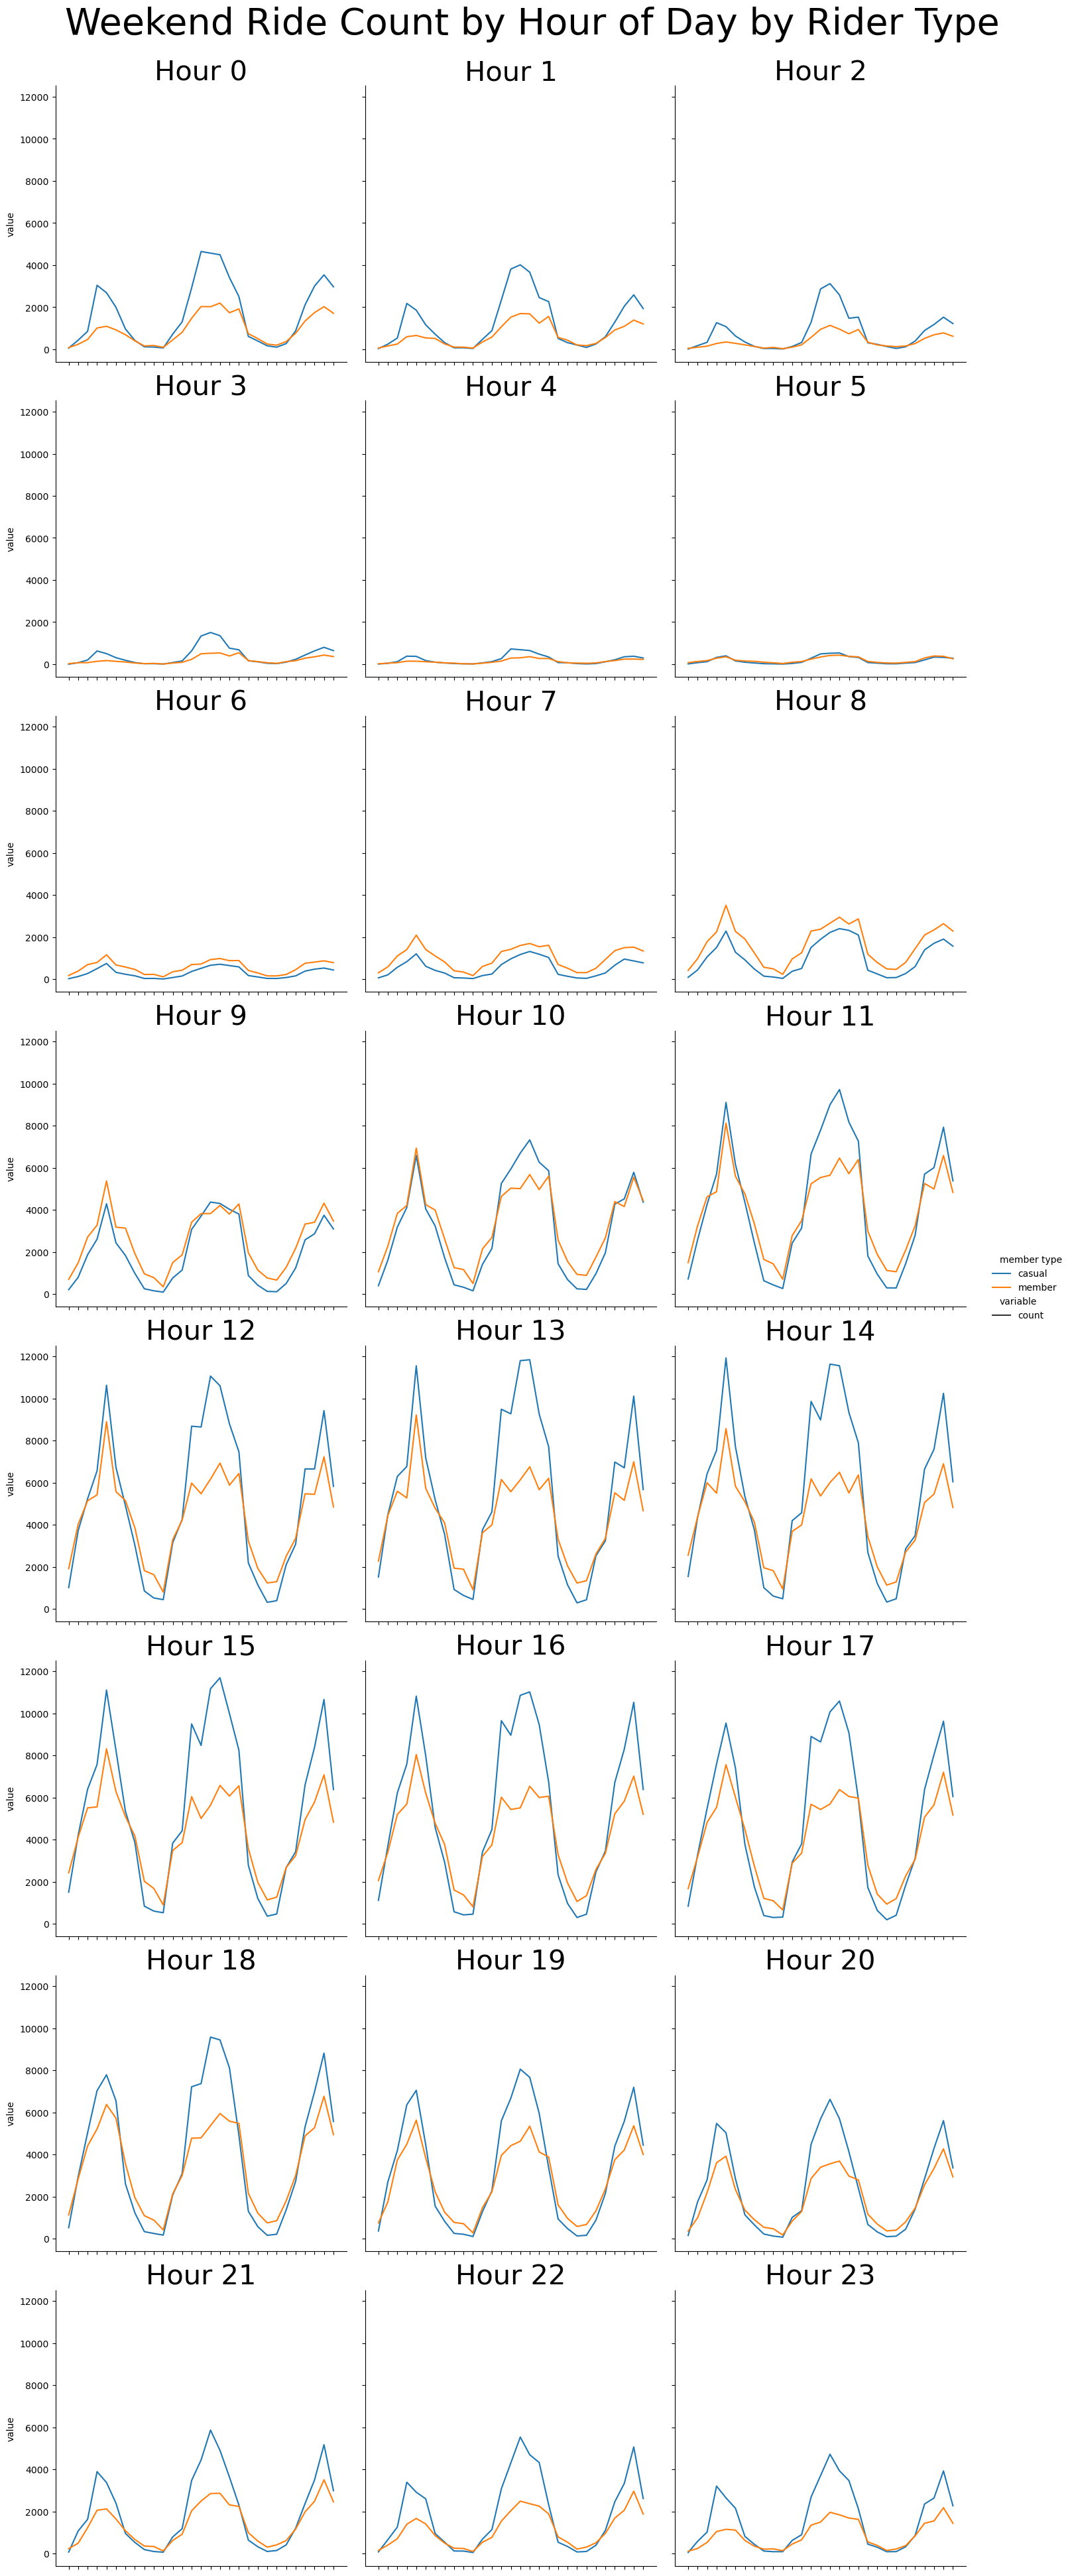

In [18]:
g=sns.relplot(
    data=dfduration_stats_weekend_count, x="Ym", y="value", col= "hr", style='variable',hue="member type", col_wrap=3, kind="line"
)
g.fig.suptitle('Weekend Ride Count by Hour of Day by Rider Type', size=40)
g.set_titles("Hour {col_name}", size=30)
g.tight_layout()
g.set_xticklabels(rotation=90)
g.set_xlabels("")
plt.subplots_adjust(top=0.95)
plt.savefig('./Figures/Weekend_Ride_Count_byHr_by_RiderType.png', bbox_inches='tight')